# Overall Steps used for building this model
1. Verify there are no null values
2. Clean the data and make appropriate mapping as required
3. User Data visualization techniques to find correlation among the variables
4. Prepare the data for multiple linear regression and handle the categorical varibales by bringing in dummy variables
5. Split the data into test and train data
6. Perform normalization and re-scaling on required variables
7. Build the models using RFE and OLS methods
8. Select best model that explains all the trends in data, perform residual analysis and validate assumptions on train data
9. Run the model on test data, check actual v/s predicted values, validate and perform residual analysis
10. Perform model interpretation and identify factors accounting for increase in rental count

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data into variable raw

raw = pd.read_csv('day.csv')

In [3]:
raw.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
raw.shape

(730, 16)

## 1. Checking for null values in data

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking statistical values of numerical variables in data

raw.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## 2. Data Cleaning and preparation
- Identifying the columns to drop
- The columns "casual" and "registered" are summed to give total count as "cnt". We will drop these two columns to avoid multicollinearity
- The variables temp and atemp are also correlated, so we will take temp and drop atemp.
- We have weekday, mnth and yr to give us the exact dates, so we can also drop dteday column
- The instant column is nothing but the index value, so we will drop the instant column also since it is redundant.
- Season variable is defined in the data dictionary. We will map the season values in the column since it is a categorical variable.
- Similarly, we wil also map the weekday values with the name of the day since it is also a categorical variable. 
- We will have to do the same operation for all other catergorical variables which are mnth and weathersit.

In [7]:
# Dropping

raw.drop(['casual','registered','atemp','dteday','instant'], axis=1, inplace=True)

In [8]:
raw.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [9]:
# Mapping

raw.season = raw.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
raw.mnth = raw.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
raw.weekday = raw.weekday.map({1:'mon', 2:'tues', 3:'wed', 4:'thur', 5:'fri', 6:'sat', 0:'sun'})
raw.weathersit = raw.weathersit.map({1:'good', 2:'moderate', 3:'bad', 4:'extreme'})

In [10]:
raw.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1   moderate  14.110847   
1  spring   0  jan        0    tues           1   moderate  14.902598   
2  spring   0  jan        0     wed           1       good   8.050924   
3  spring   0  jan        0    thur           1       good   8.200000   
4  spring   0  jan        0     fri           1       good   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

## 3. Data Visualization
- For visualization, we will first split the variables into numerical and categorical variables
- Also, we will perform univariate analysis of target variable to identify the current trends in rental count
- We will use scatter plot and box plot to identify bivariate correlations with target variable cnt
- We will finally use heatmap to understand top correlations among numerical variables

In [11]:
num = ['temp', 'hum', 'windspeed','cnt']
cat = ['season', 'yr', 'holiday', 'mnth', 'weekday', 'weathersit','workingday']

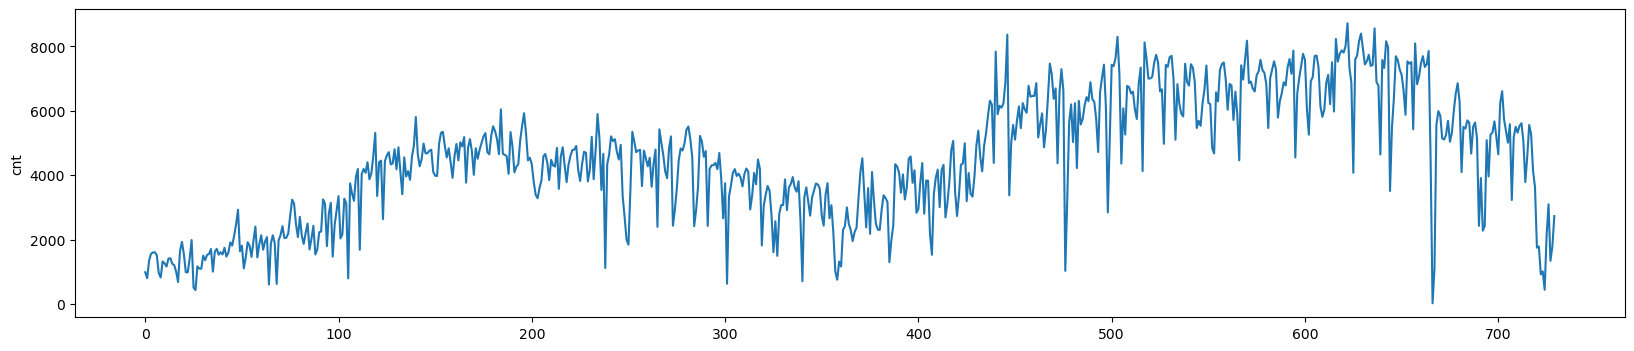

In [12]:
# Univariate Analysis

plt.figure(figsize=(20,4))
sns.lineplot(raw.cnt)
plt.show()

In [13]:
# Bivariate Analysis of categorical variables with target(cnt) variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = raw)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = raw)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = raw)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = raw)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = raw)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = raw)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = raw)
plt.show()

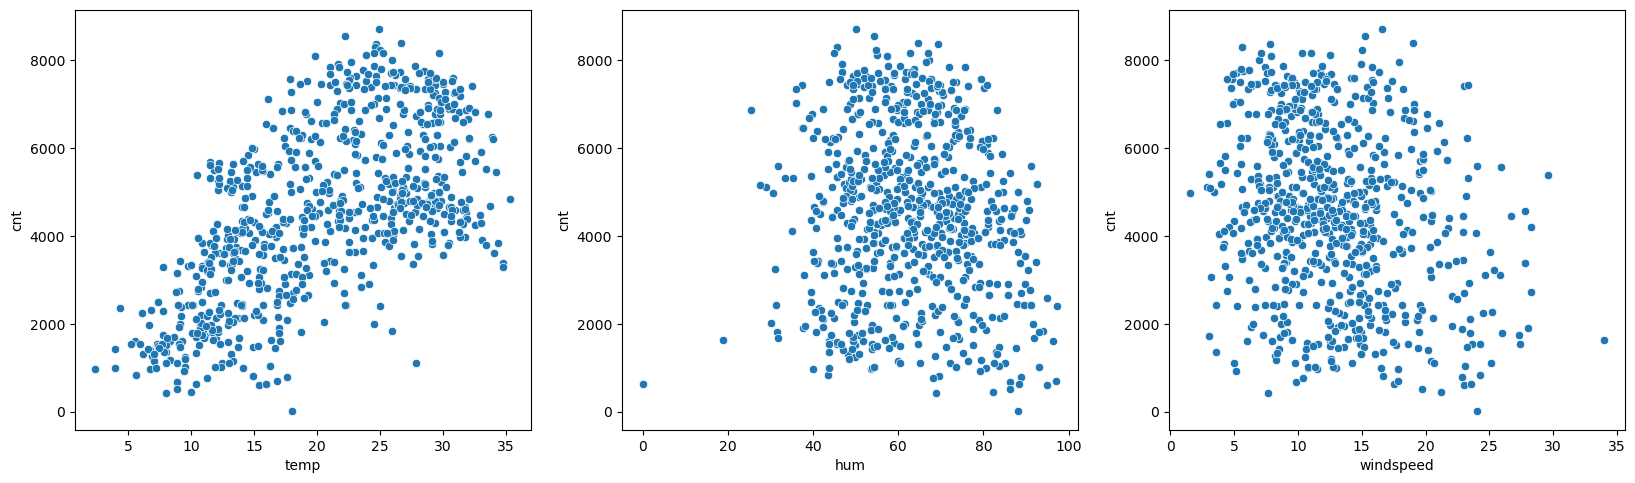

In [14]:
# Bivariate Analysis of numerical variables with target(cnt) variable

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = raw)
plt.subplot(2,3,2)
sns.scatterplot(x = 'hum', y = 'cnt', data = raw)
plt.subplot(2,3,3)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = raw)
plt.show()

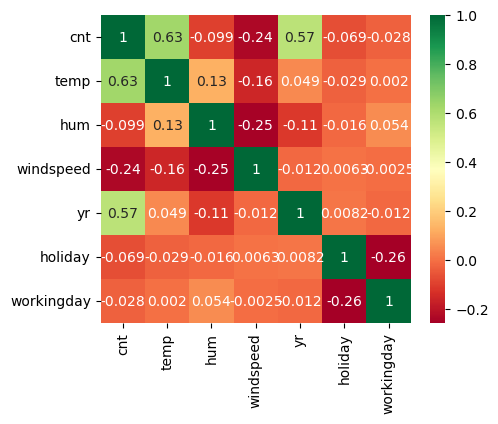

In [15]:
# Correlation heatmap

plt.figure(figsize=(5,4))
cor = ['cnt', 'temp','hum','windspeed', 'yr', 'holiday', 'workingday']
sns.heatmap(raw[cor].corr(), annot=True, cmap='RdYlGn')
plt.show()

### FINDINGS
1. Univariate Analysis
    - Recently, the demand for rental bikes has gone down
    - During the 400-650 days mark, there was a significant rise in demand but recently it is going down
2. Bivariate Categorical Analysis
    - Bike rental count is highest during Fall and lowest during Spring season
    - Year 2019 has seen a significant rise in bike rental count. The median value of rental count in 2019 is equal to the max count in year 2018
    - Rental count during holidays is significantly low when compared to a working day
    - Months May-October is the preferred time for customers to rent bike. September has recorded the highest rental counts. End of year and start of the year has seen decline in rental counts, could be due to weather conditions
    - The rental count during bad weather conditions is significantly low when compared with good and moderate weather conditions
3. Bivariate Numerical Analysis
    - Temperature has a high positive correlation with rental count
4. Correlation heatmap
    - Rental count has following correlations with other Numerical variables
    - temp : 0.63
    - hum : -0.099
    - windspeed : -0.24
    - yr : 0.57
    - holiday : -0.069
    - Rental count has positive correlation with temp and negative correlations with humidity and windspeed

## 4. Data Preparation for Linear Regression
- We will create dummy variables for all the categorical variables, which are season,mnth,weekday,weathersit

In [16]:
season_d = pd.get_dummies(raw.season, dtype=int, drop_first=True)
mnth_d = pd.get_dummies(raw.mnth, dtype=int, drop_first=True)
weekday_d = pd.get_dummies(raw.weekday, dtype=int, drop_first=True)

In [17]:
# We do not have any data for 'extreme' weather situation

raw.weathersit.value_counts()

weathersit
good        463
moderate    246
bad          21
Name: count, dtype: int64

In [18]:
# But since we are building a generic data model, we will assume that extreme weather is also possible. 
# So, we will not drop any dummy variable column for weathersit variable, assuming 000 is for extreme weather conditions

weather_d = pd.get_dummies(raw.weathersit, dtype=int)

In [19]:
raw = pd.concat([raw,season_d,mnth_d,weekday_d,weather_d], axis=1)

In [20]:
# Dropping categorical variables for whom we created the dummy variables

raw.drop(['season' ,'mnth' ,'weekday', 'weathersit'], axis=1, inplace=True)

In [21]:
raw.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           1  14.110847  80.5833  10.749882   985       1   
1   0        0           1  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  sep  mon  sat  sun  thur  tues  wed  bad  good  \
0       0       0  ...    0    1    0    0     0     0    0    0     0   
1       0       0  ...    0    0    0    0     0     1    0    0     0   
2       0       0  ...    0    0    0    0     0     0    1    0     1   
3       0       0  ...    0    0    0    0     1     0    0    0     1   
4       0       0  ...    0    0    0    0     0     0    0    0     1   

   moderate  
0         1  
1         1  
2         0  
3         0  
4         0  

[5 rows x 30 columns]

In [22]:
raw.shape

(730, 30)

## 5. Splitting data into train and test sets

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(0)


In [24]:
raw_train, raw_test = train_test_split(raw, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
print(raw_train.shape, raw_test.shape)

(510, 30) (219, 30)


## 6. Scaling(Normalization) of data

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
raw_train[num] = scaler.fit_transform(raw_train[num])

In [29]:
raw_test[num] = scaler.transform(raw_test[num])

In [30]:
raw_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.453386    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter  ...         sep  \
count  510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean     0.513620    0.243137    0.245098    0.24902  ...    0.080392   
std      0.224593    0.429398    0.430568    0.43287  ...    0.272166   
min      0.000000    0.000000    0.000000    0.00000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.00000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.00000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.00000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.00000  ...    1.000000   

              mon         sat         sun        thur        tues         wed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.154902    0.129412    0.137255    0.143137    0.152941    0.135294   
std      0.362166    0.335985    0.344454    0.350557    0.360284    0.342373   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              bad        good    moderate  
count  510.000000  510.000000  510.000000  
mean     0.029412    0.627451    0.343137  
std      0.169124    0.483958    0.475223  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    1.000000    0.000000  
75%      0.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

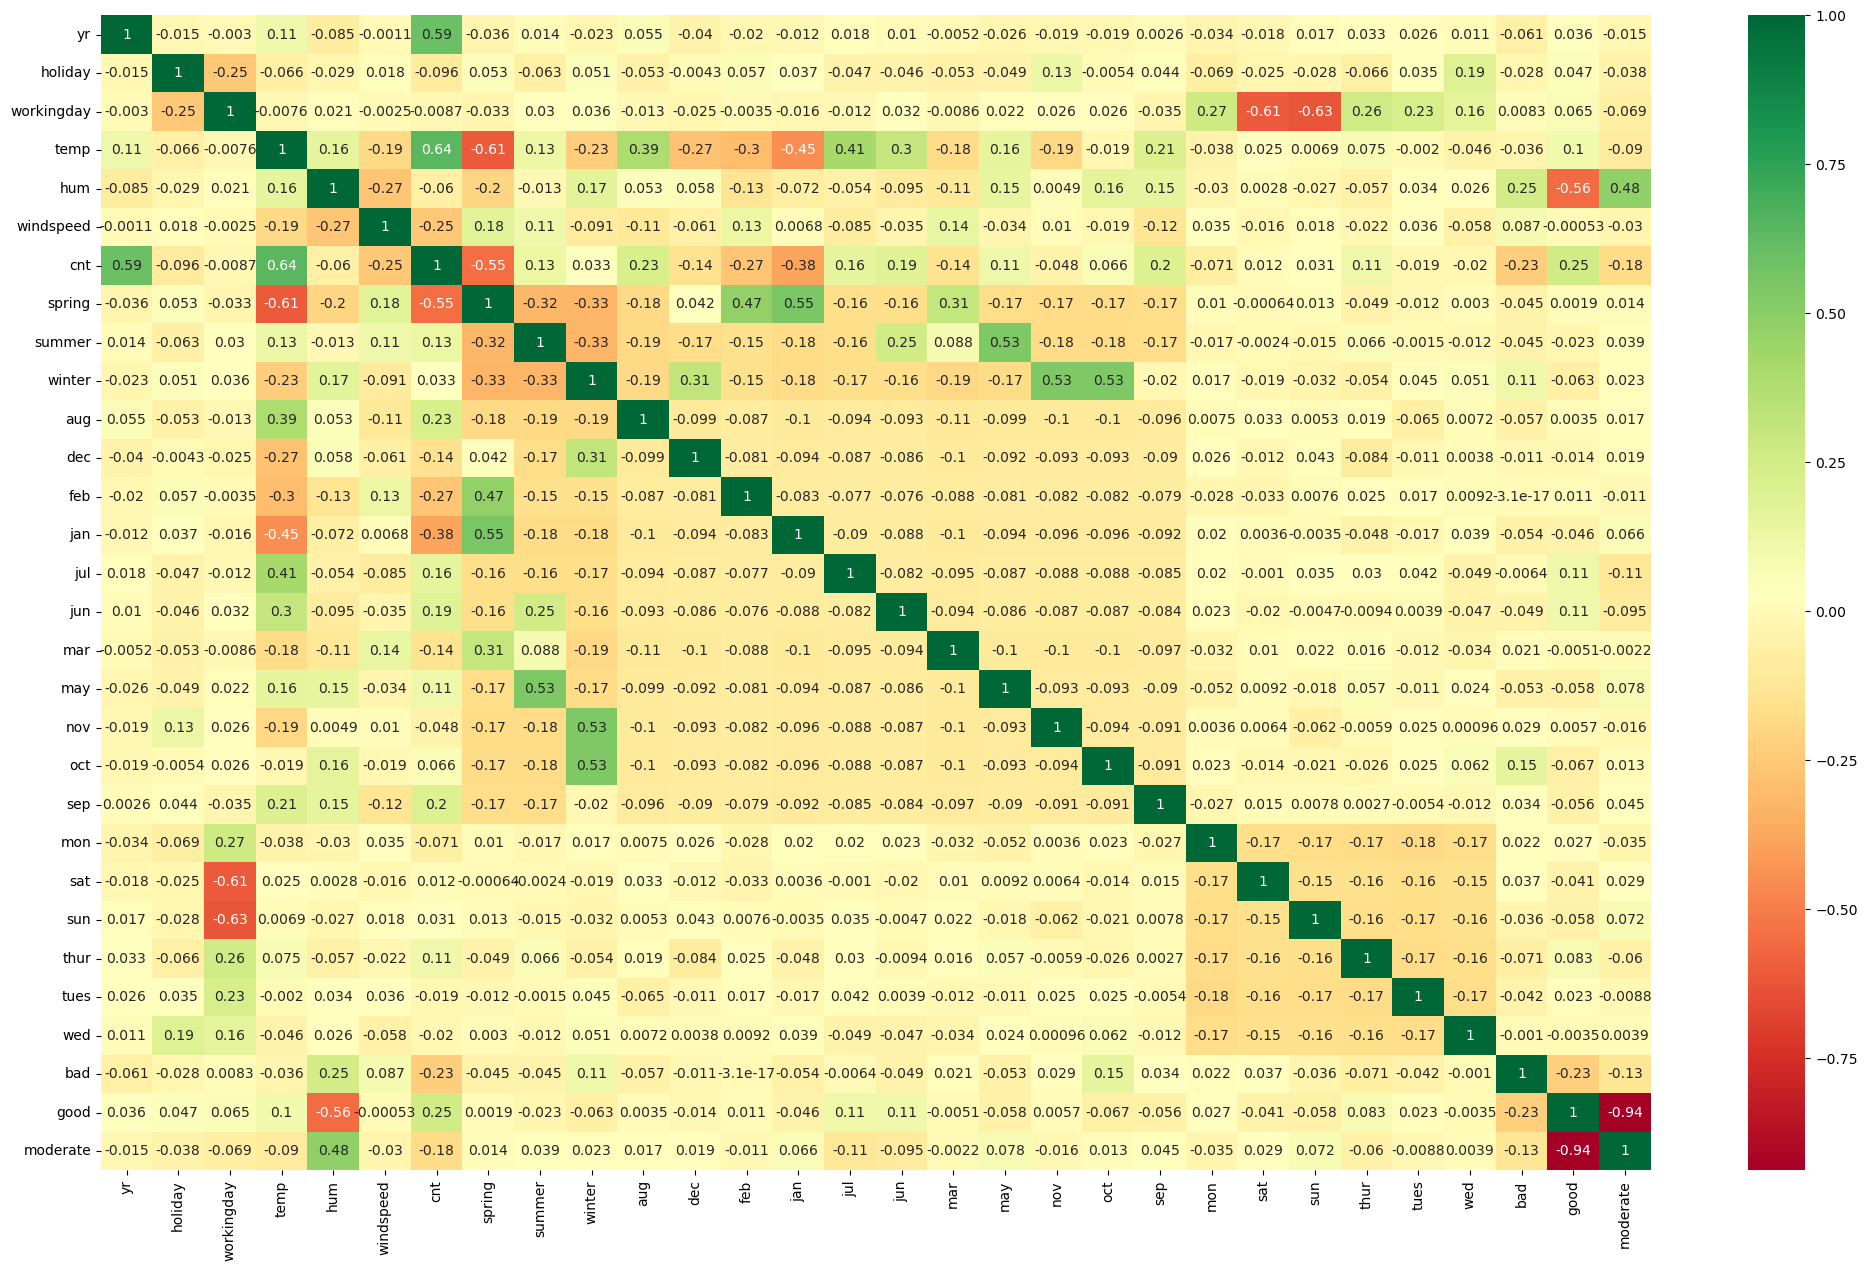

In [31]:
# Plotting another correlation heatmap to get an overall view of positive and negative correlations 
# with new dummy variables and scaled numeric variables

plt.figure(figsize = (25, 15))
sns.heatmap(raw_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

#### Dividing raw into X and y sets for model building

In [32]:
y_train = raw_train.pop('cnt')
y_test = raw_test.pop('cnt')
X_train = raw_train
X_test = raw_test

## 7. Building the model

In [33]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

Since there are now 30 feature variables to select from, we will use RFE to find the top 15 significant features and then use manual fine tuning to reduce the features using a top down approach.

In [34]:
# Fitting the data in the LR model using sklearn for further using RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thur', False, 13),
 ('tues', False, 8),
 ('wed', False, 11),
 ('bad', True, 1),
 ('good', True, 1),
 ('moderate', True, 1)]

In [37]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jan', 'jul', 'nov', 'sep', 'bad', 'good', 'moderate'],
      dtype='object')

In [38]:
# Now, we will define 2 functions. One for building a Linear Model using OLS which takes columns as parameter.
# Another one for printing VIF of all the columns provided as input in the function

def gen_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    
def VIFs(col):
    vif = pd.DataFrame()
    X = X_train[col]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [39]:
features = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'jan', 'jul', 'nov', 'sep', 'bad', 'good', 'moderate']

### MODEL 1

In [40]:
# Selecting all features suggested by RFE

gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          2.25e-189
Time:                        02:04:03   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1533      0.029      5.273      0.0

In [41]:
# Removing Nov since it is insignificant because of high p-value

features.remove('nov')

### MODEL 2

In [42]:
# New model after removing nov from selected features list

gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.45e-190
Time:                        02:04:03   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1481      0.029      5.128      0.0

### MODEL 3

In [43]:
# Now, we have a model having high r2 and adjusted r2. But the VIF value for good weather condition is very high. 
# Also, the p-value for jan is also on the higher side.
# We will eliminate the feature jan since it is insignificant and then observe the VIFs again.

features.remove('jan')
gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.69e-190
Time:                        02:04:03   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1400      0.029      4.889      0.0

In [44]:
# Checking for correlation among remaining variables

plt.figure(figsize=(10,8))
sns.heatmap(X_train[features].corr(), annot=True, cmap='RdYlGn')
plt.show()

### MODEL 4

In [45]:
# Weather condition 'good' has high VIF which means it has high collinearity with other variables, so, we will drop this too

features.remove('good')
gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.69e-190
Time:                        02:04:04   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

### MODEL 5

In [46]:
# The r2 value has not changed at all which signifies that dropping feature 'good' has not changed the model substantially
# Continuing to eliminate features based on VIF, we will remove feature 'hum' next

features.remove('hum')
gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          2.40e-187
Time:                        02:04:04   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

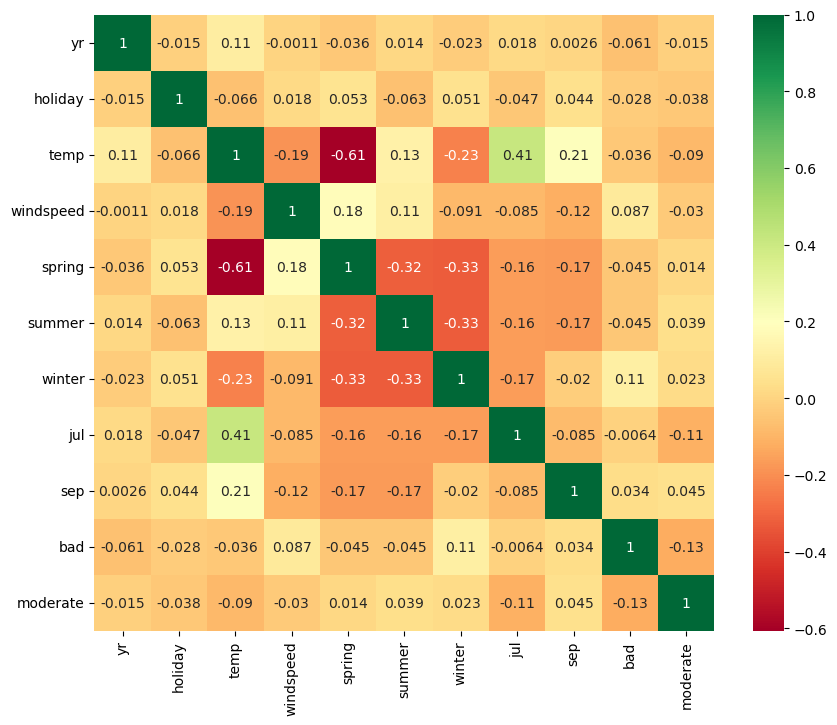

In [47]:
# Checking for correlation among remaining variables

plt.figure(figsize=(10,8))
sns.heatmap(X_train[features].corr(), annot=True, cmap='RdYlGn')
plt.show()

### MODEL 6

In [48]:
# 'temp' and 'july' are significantly correlated, so we will remove 'jul' since it has negative coefficient with target variable

features.remove('jul')
gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          7.36e-187
Time:                        02:04:05   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

In [49]:
# Checking for correlation among remaining variables

plt.figure(figsize=(10,8))
sns.heatmap(X_train[features].corr(), annot=True, cmap='RdYlGn')
plt.show()

### MODEL 7

In [50]:
# The feature windspeed has the highest collinearity among remaining variables.
# We will remove 'windspeed' next and observe if there is a huge dip in r2 value 

features.remove('windspeed')
gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          6.89e-181
Time:                        02:04:06   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1415      0.029      4.833      0.0

In [51]:
# Removing the feature 'windspeed' does not have a significant impact on r2 value.
# Thus we will continue with the remaining features and remove 'windspeed' from our final model

### MODEL 8

In [52]:
# The model seems to be stable. 
# But we will experiment with other remaining features to check if removing any feature has a significant dip in overall fit of the model.
# Now, feature 'bad' has the highest negative coefficient among the remaining feature variables. 
# We will remove 'bad' and see if it causes a significant dip in r2 score

features.remove('bad')
gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     212.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.22e-155
Time:                        02:04:06   Log-Likelihood:                 415.90
No. Observations:                 510   AIC:                            -813.8
Df Residuals:                     501   BIC:                            -775.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1173      0.033      3.559      0.0

In [53]:
# Removing 'bad' has reduced our model fit considerably, so, we will keep the variable since it is significant

features.append('bad')

### MODEL 9

In [54]:
# Now, we will remove 'holiday' since it now has the highest negative coefficient among remaining features

features.remove('holiday')
gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.09e-179
Time:                        02:04:06   Log-Likelihood:                 471.38
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     501   BIC:                            -886.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.030      4.690      0.0

In [55]:
# Removing 'holiday' feature does not have significant impact on r2 square, thus we will remove this from final model

### MODEL 10

In [56]:
# Again, we have another feature 'spring' which has negative coefficient with target variable
# We will remove 'spring' and observe if it has an impact on the r2 score

features.remove('spring')
gen_model(features)
VIFs(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.91e-178
Time:                        02:04:07   Log-Likelihood:                 466.55
No. Observations:                 510   AIC:                            -917.1
Df Residuals:                     502   BIC:                            -883.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0575      0.014      4.200      0.0

In [57]:
# r2 score has only dipped by 0.004. We will remove 'spring' and continue with the remaining features

## 8. Select the best model, perform residual analysis and validate assumptions

### INFERENCES

#### - At this point, we have a pretty good model which has r2 score of 81.3 and adjusted r2 score of 81.1. After this point, we observe that if we drop any other features, there is a significant drop in r2 score. 
#### - The VIF scores are all within the accepted limits, also, p-value for every feature is almost 0.
#### - No feature is insignificant at this point and the difference between r2 and adjusted r2 is very less which confirms that no additional features can be removed from this model
#### - We can finalize the remaining features to define our final model.

In [58]:
# We will now use sklearn to build final model since we don't require the statistical metrics of the model right now

lr_sk = LinearRegression()
model = lr_sk.fit(X_train[features], y_train)

In [59]:
features

['yr', 'temp', 'summer', 'winter', 'sep', 'moderate', 'bad']

In [60]:
print (model.intercept_, model.coef_)

0.05745288629923967 [ 0.23186886  0.57793984  0.08257373  0.13683997  0.10406479 -0.07609056
 -0.29452603]


#### Residue calculation and validating assumptions used for Linear Regression

In [61]:
y_train_pred = model.predict(X_train[features])

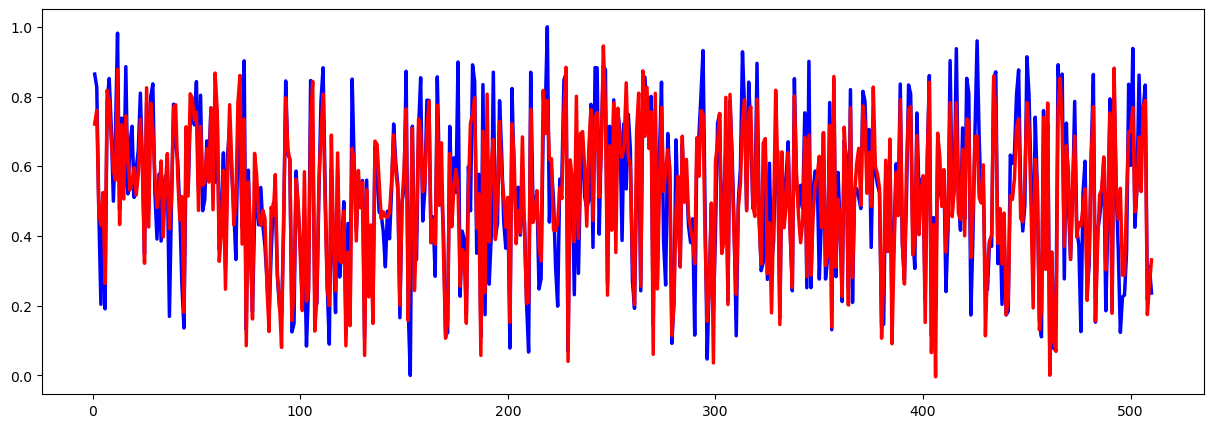

In [62]:
c = [i for i in range(1,len(X_train)+1,1)]

fig = plt.figure(figsize=(15,5))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
plt.show()

In [63]:
res = y_train - y_train_pred

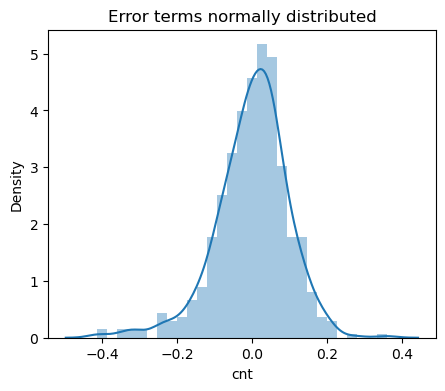

In [64]:
# Error terms are normally distributed with mean 0

plt.figure(figsize=(5,4))
sns.distplot(res)
plt.title("Error terms normally distributed")
plt.show()

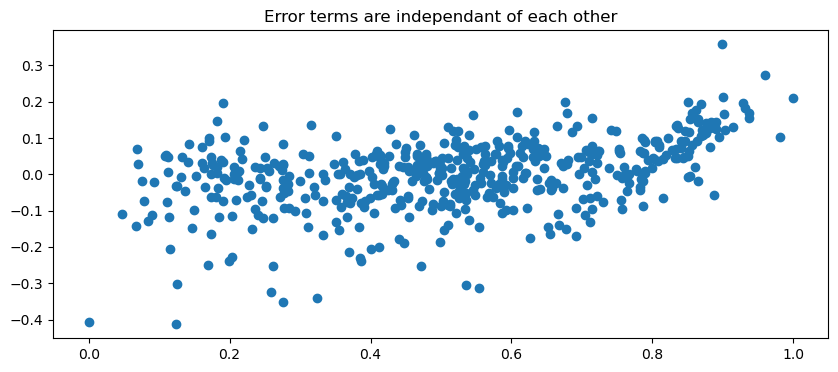

In [65]:
# Error terms are independant of each other

plt.figure(figsize=(10,4))
plt.scatter(y_train, res)
plt.title("Error terms are independant of each other")
plt.show()

In [66]:
# R-squared value for training set

print(r2_score(y_train,y_train_pred))

0.813364242955694


## 9. Run the model on test data, check actual v/s predicted values, validate and perform residual analysis

In [67]:
# Calculating predicted values for test data
y_test_pred = model.predict(X_test[features])

In [68]:
c = [i for i in range(1,len(X_test)+1,1)]

fig = plt.figure(figsize=(10,4))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")

In [69]:
pred_res = y_test_pred-y_test

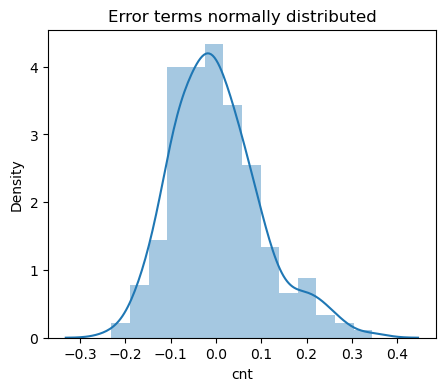

In [70]:
# Error terms are normally distributed with mean 0

plt.figure(figsize=(5,4))
sns.distplot(pred_res)
plt.title("Error terms normally distributed")
plt.show()

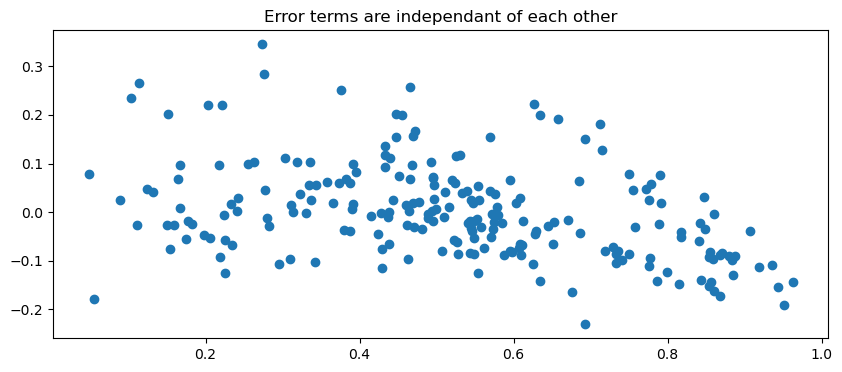

In [71]:
# Error terms are independant of each other

plt.figure(figsize=(10,4))
plt.scatter(y_test, pred_res)
plt.title("Error terms are independant of each other")
plt.show()

In [72]:
# R-squared value for test set

r2_score(y_test,y_test_pred)

0.7960366465278594

The R2 value for predictions on the test data (0.813) is nearly identical to the R2 value for the training data (0.796). This high R2 value indicates that our model performs well on test data.

## 10. Perform model interpretation and identify factors accounting for increase in rental count

In [73]:
# Generating a stats models model for our final model

gen_model(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.91e-178
Time:                        02:04:09   Log-Likelihood:                 466.55
No. Observations:                 510   AIC:                            -917.1
Df Residuals:                     502   BIC:                            -883.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0575      0.014      4.200      0.0

### FINAL LINEAR REGRESSION EQUATION

Rental Count = 0.0575 + (0.2319 * yr) + (0.5779 * temp) + (0.0826 * summer) + (0.1368 * winter) + (0.1041 * sep) 
                + (-0.0761 * moderate) + (-0.2945 * bad)

### INFERENCES FROM THE FINAL MODEL :
- The most significant feature is temperature. The pre-pandemic data shows high correlation between 'temp' and 'cnt' variables which means that higher the temperature, higher is the rental count.
- There are two season variables in the model, winter and summer, both have positive coefficients and thus positive impact on the rental count. Infact, from model 9 and boxplot visualizations, we can see that spring is the only season which has a negative impact on rental count. So, people do not rent bikes in Spring when compared with other seasons. Boom Bikes can expect a dip in rentals during Spring season and may utilize this time for maintenance or strategizing for the upcoming season.
- The two negative coefficients in the model are for weather conditions bad and moderate. Which means that the business would be highest when weather is good i.e. Clear, Few clouds, Partly cloudy. Days with snow or rain or fog does not attract customers so Boom Bikes can expect very less business when weather conditions are bad.
- The pre-pandemic data shows that rental count is almost double during 2019 as compared to 2018. This is a very nice insight since it means that people are really liking the service provided by Boom Bikes and the rental count would only increase as more and more people get to know about their company.
- September is the month to target for Boom Bikes to significantly expand their business. They can advertise more building up to September since the season, temperature and weather conditions will be optimal during September for renting bikes as per the pre-pandemic data.